In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cut_tree

<h3>Task 1</h3>

 In combinatorics, a [Stirling number of the second kind](https://en.wikipedia.org/wiki/Stirling_numbers_of_the_second_kind) is the number of ways to partition a set of *n* objects into *k* non-empty subsets:
 
\begin{equation*}
    S(n,k) = \frac{1}{k!} \sum_{j=1}^{k} (-1)^{k-j} \binom{k}{j} j^n
\end{equation*}

Partitioning three objects ($\{a,b,c\}$) into two (non-empty) subsets:

$$\{a\}, \, \{b,c\}$$
$$\{b\}, \, \{a,c\}$$
$$\{c\}, \, \{a,b\}$$

Partitioning 5 objects ($\{a,b,c,d,e\}$) into 4 (non-empty) subsets:

$$\{a,b\}, \, \{c\}, \, \{d\}, \{e\}$$
$$\{a,c\}, \, \{b\}, \, \{d\}, \{e\}$$
$$\{a,d\}, \, \{c\}, \, \{b\}, \{e\}$$
$$\{a,e\}, \, \{c\}, \, \{d\}, \{b\}$$

$$\{b,c\}, \, \{a\}, \, \{d\}, \{e\}$$
$$\{b,d\}, \, \{c\}, \, \{a\}, \{e\}$$
$$\{b,e\}, \, \{c\}, \, \{d\}, \{a\}$$

$$\{c,d\}, \, \{a\}, \, \{b\}, \{e\}$$
$$\{c,e\}, \, \{a\}, \, \{d\}, \{b\}$$

$$\{d,e\}, \, \{a\}, \, \{b\}, \{c\}$$

In [1]:
def factorial(n):
    result = 1
    for i in range(n, 0, -1):
        result *= i
    return result

In [2]:
def binomial_coef(n, k):
    result = factorial(n) / (factorial(k) * factorial(n - k))
    return int(result)

In [14]:
def S(n, k):
    result = 0
    for j in range(1, k+1):
        result += (-1)**(k-j) * binomial_coef(k,j) * j**n
    print(f"{n} objects can be divided into {k} non-empty subsets in")
    print(int((1 / factorial(k)) * result))
    print("different ways")

In [15]:
S(5,4)

5 objects can be divided into 4 non-empty subsets in
10
different ways


In [16]:
S(130,2)

130 objects can be divided into 2 non-empty subsets in
680564733841876926926749214863536422912
different ways


In [17]:
S(400,4)

400 objects can be divided into 4 non-empty subsets in
277833934703327245997112258121573918209631839869621868966983244898086163438115591228601102823689354628342639079443628228181823960959973566357774551996598823282816298556375604015240540962051944543038917098843742340556921934486537383064895488
different ways


<h3>Task 2</h3>

In [22]:
D = np.array([[0,14,11,2,12],
              [14,0,5,8,7],
              [11,5,0,9,8],
              [2,8,9,0,1],
              [12,7,8,1,0]])

In [34]:
print(D)

[[ 0 14 11  2 12]
 [14  0  5  8  7]
 [11  5  0  9  8]
 [ 2  8  9  0  1]
 [12  7  8  1  0]]


In [30]:
# Non-negativity
(D >= 0).all()

np.True_

In [28]:
# Symmetric
(D == D.T).all()

np.True_

In [33]:
# The distance between an object and itself is zero
(np.diag(D) == 0).all()

np.True_

In [79]:
def plot_dendogram(D):
    condensed_D = ssd.squareform(D)
    # Perform hierarchical clustering using the distance matrix and complete linkage
    hc = sch.linkage(condensed_D, method="complete")
    
    ##### Plotting #####
    plt.figure(figsize=(8,6), dpi=100)
    dendogram = sch.dendrogram(hc, labels=["a","b","c","d","e"])
    plt.xlabel("Objects", size=12)
    plt.ylabel("Distance", size=12)
    #plt.axhline(y=9, color="r", linestyle="--", label="Cut-off point for two clusters")
    #plt.legend(loc="upper left", bbox_to_anchor=(1,1));

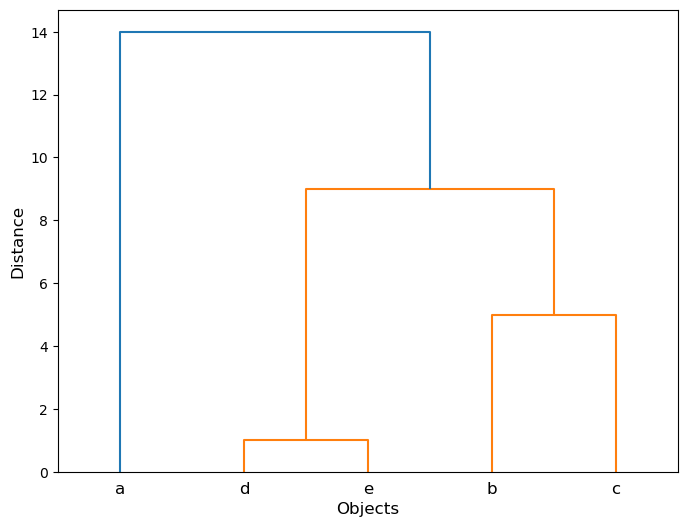

In [80]:
plot_dendogram(D)

<h3>Task 3</h3>

In [83]:
df = pd.read_csv("/Users/herrakaava/Documents/school/monimuuttujamenetelmat/week_4/msq.csv", index_col=0)

In [95]:
df.head()

,active,afraid,alert,angry,anxious,aroused,ashamed,astonished,at.ease,at.rest,...,Sociability,Impulsivity,MSQ_Round,ID,condition,MSQ_Time,TOD,TOD24,scale,exper
1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,3.0,4.0,15.0,193.0,2,15.30,15.00,NaN,r,Rim.1
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,11.0,6.0,15.0,130.0,2,15.30,15.00,NaN,r,Rim.2
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,8.0,5.0,15.0,2135.0,2,15.30,15.00,NaN,r,Rim.2
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,...,12.0,7.0,NaN,18.0,2,NaN,NaN,NaN,r,COPE
5,2.0,0.0,1.0,0.0,NaN,2.0,0.0,3.0,3.0,1.0,...,5.0,7.0,6.0,2.0,5,5.75,5.83,5.5,msq,rob-1


In [96]:
df.shape

(3896, 92)

In [91]:
# The number of columns with missing values
df.isna().any().sum()

np.int64(88)

In [92]:
# Select the first 72 variables
X = df.iloc[:, :72]

In [93]:
# Drop missing values
X = X.dropna()

In [94]:
X.shape

(1747, 72)

In [99]:
X.isna().any().any()

np.False_

In [206]:
def cluster_emotions(x, distance_metric, linkage_method, cut=False, num_clusters=None):
    """
    Notes:
    - Instead of storing all the values of the (square) distance matrix,
      the condensed distance matrix only stores the upper triangular 
      (or lower triangular) part of the square matrix (excluding the diagonal).
      This condensed format is more memory efficient because the distance matrix
      is symmetrix, and the diagonal values are zero.
    """
    assert distance_metric in ["spearman", "cityblock"], "Distance metric not supported"
    
    if distance_metric == "spearman":
        # Calculate the Spearman correlation matrix
        spearman_corr = x.corr(method="spearman")
        # Use a distance matrix of the form 1 - ρ_{jk},
        D = 1 - spearman_corr
        # Convert the distance matrix into a condensed distance matrix format
        # (required for hierarchical clustering in scipy)
        D = squareform(D)
        hc = linkage(D, method=linkage_method)
    
    elif distance_metric == "cityblock":
        D = pdist(x.T, metric=distance_metric)
        hc = linkage(D, method=linkage_method)
    
    ##### Plotting #####
    plt.figure(figsize=(8,6),dpi=100)
    
    dgram = dendrogram(hc, labels=x.columns, leaf_rotation=90)
    plt.title(f"Hierarchical clustering with {distance_metric} distance and {linkage_method} linkage")
    plt.xlabel("Object")
    plt.ylabel("Distance")
    plt.show();
    
    # Cut the dendogram into the desired number of clusters
    if cut:
        clusters = sch.fcluster(Z=hc, t=num_clusters, criterion="maxclust")
    
        # Create a mapping between column names and cluster labels
        col_clust_map = dict(zip(x.columns, clusters))
        
        # Create a dict to group the variables by clusters
        clust_dict = {i: [] for i in range(1, num_clusters+1)}
        
        # Map each variable into its corresponding cluster
        for col, label in col_clust_map.items():
            clust_dict[label].append(col)
            
        # Convert the dict into a df
        clust_df = pd.DataFrame.from_dict(clust_dict, orient="index").transpose()
        clust_df.columns = [f"Cluster {i}" for i in range(1, num_clusters+1)]
        print(clust_df)

**Manhattan Distance**

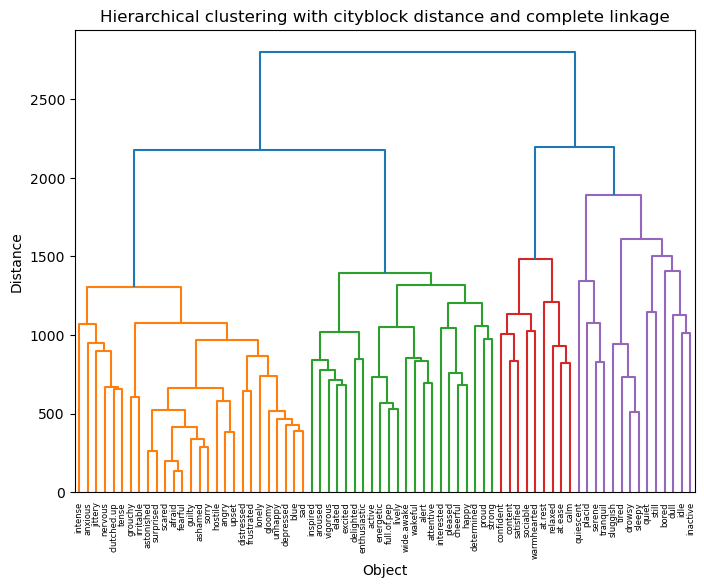

      Cluster 1     Cluster 2    Cluster 3  Cluster 4
0        afraid        active      at.ease      bored
1         angry         alert      at.rest     drowsy
2       anxious       aroused         calm       dull
3       ashamed     attentive    confident       idle
4    astonished      cheerful      content   inactive
5          blue     delighted      relaxed     placid
6   clutched.up    determined    satisfied  quiescent
7     depressed        elated     sociable      quiet
8    distressed     energetic  warmhearted     serene
9       fearful  enthusiastic         None     sleepy
10   frustrated       excited         None   sluggish
11       gloomy   full.of.pep         None      still
12      grouchy         happy         None      tired
13       guilty      inspired         None   tranquil
14      hostile    interested         None       None
15      intense        lively         None       None
16    irritable       pleased         None       None
17      jittery         prou

In [207]:
cluster_emotions(X, 
                 distance_metric="cityblock", 
                 linkage_method="complete", 
                 cut=True, 
                 num_clusters=4)

**Spearman**

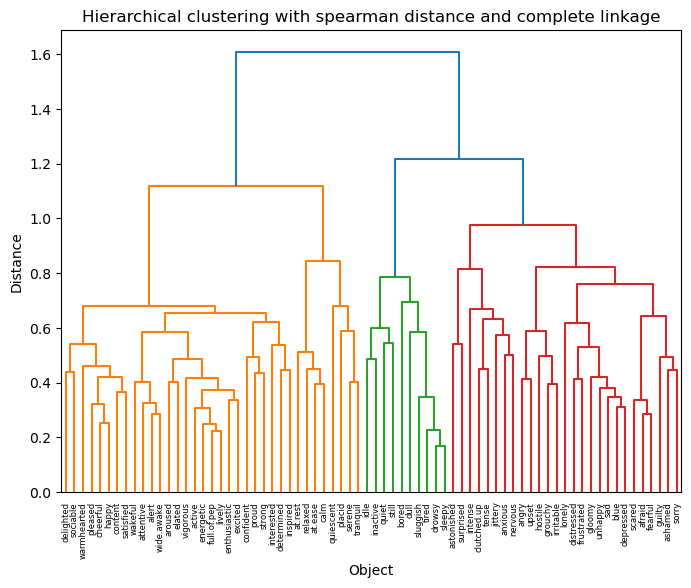

       Cluster 1  Cluster 2 Cluster 3    Cluster 4
0         active    at.ease     bored       afraid
1          alert    at.rest    drowsy        angry
2        aroused       calm      dull      anxious
3      attentive     placid      idle      ashamed
4       cheerful  quiescent  inactive   astonished
5      confident    relaxed     quiet         blue
6        content     serene    sleepy  clutched.up
7      delighted   tranquil  sluggish    depressed
8     determined       None     still   distressed
9         elated       None     tired      fearful
10     energetic       None      None   frustrated
11  enthusiastic       None      None       gloomy
12       excited       None      None      grouchy
13   full.of.pep       None      None       guilty
14         happy       None      None      hostile
15      inspired       None      None      intense
16    interested       None      None    irritable
17        lively       None      None      jittery
18       pleased       None    

In [208]:
cluster_emotions(X, 
                 distance_metric="spearman", 
                 linkage_method="complete", 
                 cut=True, 
                 num_clusters=4)

<h3>Task 4</h3>

In [4]:
animals = pd.read_csv("/Users/herrakaava/Documents/school/monimuuttujamenetelmat/week_4/animals.csv", index_col=0)

In [7]:
animals.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins
aardvark,1,0,0,1,0,0,1,1,1,1,0,0
antelope,1,0,0,1,0,0,0,1,1,1,0,0
bass,0,0,1,0,0,1,1,1,1,0,0,1
bear,1,0,0,1,0,0,1,1,1,1,0,0
boar,1,0,0,1,0,0,1,1,1,1,0,0


In [8]:
animals.shape

(100, 12)

In [9]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, aardvark to wren
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      100 non-null    int64
 1   feathers  100 non-null    int64
 2   eggs      100 non-null    int64
 3   milk      100 non-null    int64
 4   airborne  100 non-null    int64
 5   aquatic   100 non-null    int64
 6   predator  100 non-null    int64
 7   toothed   100 non-null    int64
 8   backbone  100 non-null    int64
 9   breathes  100 non-null    int64
 10  venomous  100 non-null    int64
 11  fins      100 non-null    int64
dtypes: int64(12)
memory usage: 10.2+ KB


In [10]:
animals.isna().any()

hair        False
feathers    False
eggs        False
milk        False
airborne    False
aquatic     False
predator    False
toothed     False
backbone    False
breathes    False
venomous    False
fins        False
dtype: bool

In [146]:
def f(x, num_clust: int, distance_metric: str, linkage_method: str):
    """
    Perform hierarchical clustering, PCA, and plot a biplot similar to R output.
    
    Params:
    x -- input data
    num_clust -- the number of clusters to form
    distance_metric -- distance metric to be used
    linkage_method -- linkage method to be used
    
    Notes:
    - By default, pdist() calculates the pairwise distances between
      the rows (data points) of a matrix.
    """
    ##### Clustering #####
    # Calculate the pairwise distances between the rows
    D = pdist(x, metric=distance_metric)
    
    # Perform hierarchical clustering using
    hc = linkage(D, method=linkage_method)
    
    # Cut the dendrogram to form clusters
    # For 100 rows (data points), an array of length 100
    # is returned, where the index i indicates to which group (cluster)
    # the ith row belongs to
    cut_hc = cut_tree(hc, n_clusters=num_clust).flatten()
    
    ##### PCA #####
    # Random noise to avoid overlapping data points
    noise_matrix = np.random.normal(scale=0.02, size=x.shape)
    
    # Fit the PCA with the added noise
    pca_model = PCA(n_components=None)
    pca_result = pca_model.fit_transform(x + noise_matrix)
    
    ##### Plotting #####
    # Create a palette of distinct colors for the clusters
    palette = sns.color_palette('pastel6', num_clust)
    
    # Define different markers for each cluster
    markers = ['o', 's', 'P', '^']
    
    plt.figure(figsize=(12, 10))
    
    # Plot each cluster with different colors and markers
    for cluster in range(num_clust):
        # Create a mask (bool arr) to identify which data points
        # belong to the current cluster
        cluster_mask = cut_hc == cluster
        plt.scatter(pca_result[cluster_mask, 0], pca_result[cluster_mask, 1], 
                    c=[palette[cluster]], label=f'Cluster {cluster+1}', 
                    marker=markers[cluster], 
                    s=100)
    
    # Add labels to the points
    for i, label in enumerate(x.index):
        plt.text(x=pca_result[i, 0], y=pca_result[i, 1], s=label, fontsize=9)
    
    # Decorate the plot
    plt.xlabel(f'Dim1 ({pca_model.explained_variance_ratio_[0]*100:.1f}%)')
    plt.ylabel(f'Dim2 ({pca_model.explained_variance_ratio_[1]*100:.1f}%)')
    plt.legend(title='Clusters', loc='upper left', bbox_to_anchor=(1,0.6))
    plt.axhline(y=0, color='black',linewidth=1, linestyle='--')
    plt.axvline(x=0, color='black',linewidth=1, linestyle='--')
    plt.grid(True)
    plt.show()
    
    ##### Present the animals in their corresponding cluster in a df #####
    # Create a mapping between data points (animals) and cluster labels
    animal_clust_map = dict(zip(x.index, cut_hc+1))
        
    # Create a an empty dictionary to group the data points by the clusters
    clust_dict = {i: [] for i in range(1, num_clust+1)}
        
    # Map each animal into its corresponding cluster
    for animal, cluster in animal_clust_map.items():
        clust_dict[cluster].append(animal)
            
    # Convert the dict into a df
    clust_df = pd.DataFrame.from_dict(clust_dict, orient="index").transpose()
    #clust_df.columns = [f"Cluster {i}" for i in range(1, num_clust+1)]
    print(clust_df)

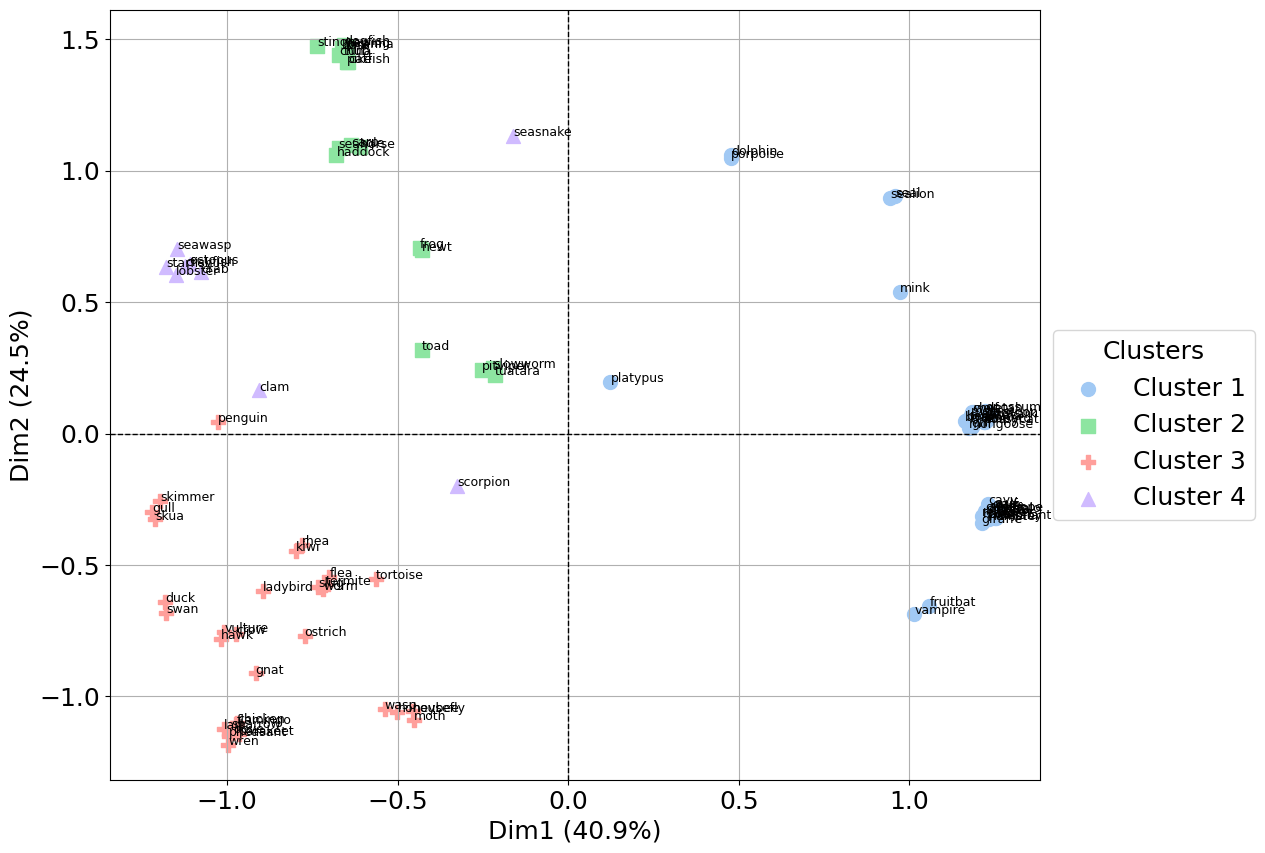

           1         2         3         4
0   aardvark      bass   chicken      clam
1   antelope      carp      crow      crab
2       bear   catfish      dove  crayfish
3       boar      chub      duck   lobster
4    buffalo   dogfish  flamingo   octopus
5       calf      frog      flea  scorpion
6       cavy   haddock      gnat  seasnake
7    cheetah   herring      gull   seawasp
8       deer      newt      hawk  starfish
9    dolphin      pike  honeybee      None
10  elephant   piranha  housefly      None
11  fruitbat  pitviper      kiwi      None
12   giraffe  seahorse  ladybird      None
13      girl  slowworm      lark      None
14      goat      sole      moth      None
15   gorilla  stingray   ostrich      None
16   hamster      toad  parakeet      None
17      hare   tuatara   penguin      None
18   leopard      tuna  pheasant      None
19      lion      None      rhea      None
20      lynx      None   skimmer      None
21      mink      None      skua      None
22      mol

In [147]:
f(animals, num_clust=4, distance_metric='cityblock', linkage_method='complete')

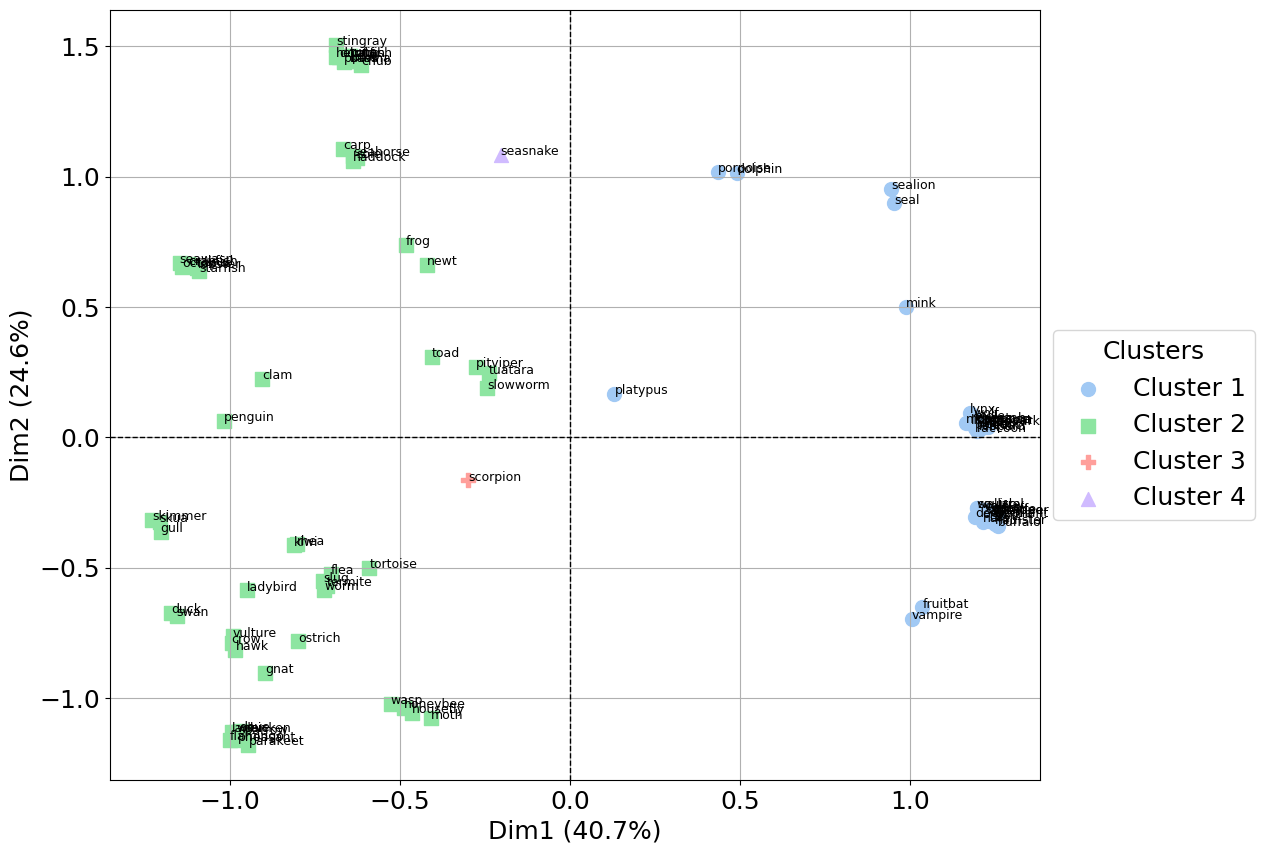

           1         2         3         4
0   aardvark      bass  scorpion  seasnake
1   antelope      carp      None      None
2       bear   catfish      None      None
3       boar   chicken      None      None
4    buffalo      chub      None      None
5       calf      clam      None      None
6       cavy      crab      None      None
7    cheetah  crayfish      None      None
8       deer      crow      None      None
9    dolphin   dogfish      None      None
10  elephant      dove      None      None
11  fruitbat      duck      None      None
12   giraffe  flamingo      None      None
13      girl      flea      None      None
14      goat      frog      None      None
15   gorilla      gnat      None      None
16   hamster      gull      None      None
17      hare   haddock      None      None
18   leopard      hawk      None      None
19      lion   herring      None      None
20      lynx  honeybee      None      None
21      mink  housefly      None      None
22      mol

In [149]:
f(animals, num_clust=4, distance_metric='cityblock', linkage_method='single')

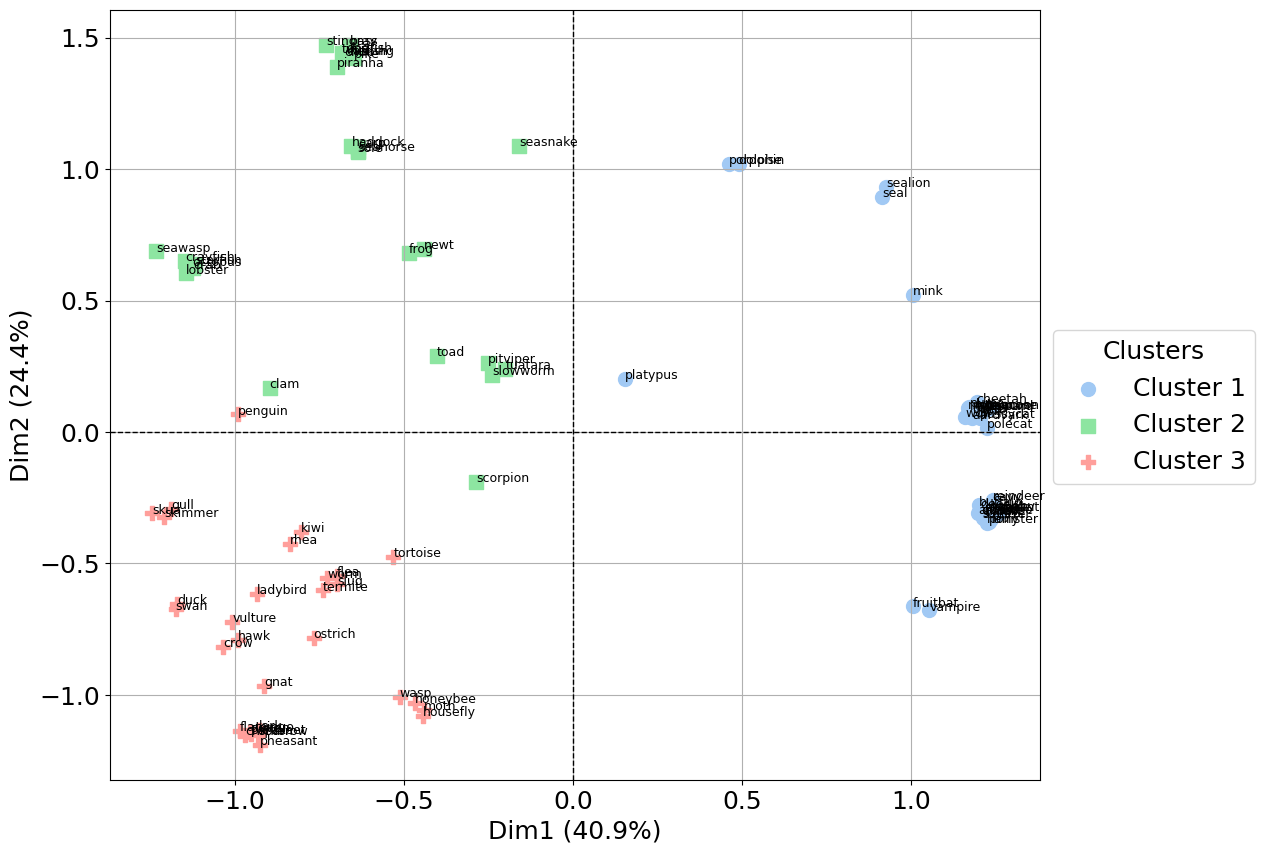

           1         2         3
0   aardvark      bass   chicken
1   antelope      carp      crow
2       bear   catfish      dove
3       boar      chub      duck
4    buffalo      clam  flamingo
5       calf      crab      flea
6       cavy  crayfish      gnat
7    cheetah   dogfish      gull
8       deer      frog      hawk
9    dolphin   haddock  honeybee
10  elephant   herring  housefly
11  fruitbat   lobster      kiwi
12   giraffe      newt  ladybird
13      girl   octopus      lark
14      goat      pike      moth
15   gorilla   piranha   ostrich
16   hamster  pitviper  parakeet
17      hare  scorpion   penguin
18   leopard  seahorse  pheasant
19      lion  seasnake      rhea
20      lynx   seawasp   skimmer
21      mink  slowworm      skua
22      mole      sole      slug
23  mongoose  starfish   sparrow
24   opossum  stingray      swan
25      oryx      toad   termite
26  platypus   tuatara  tortoise
27   polecat      tuna   vulture
28      pony      None      wasp
29  porpoi

In [150]:
f(animals, num_clust=3, distance_metric='cityblock', linkage_method='complete')

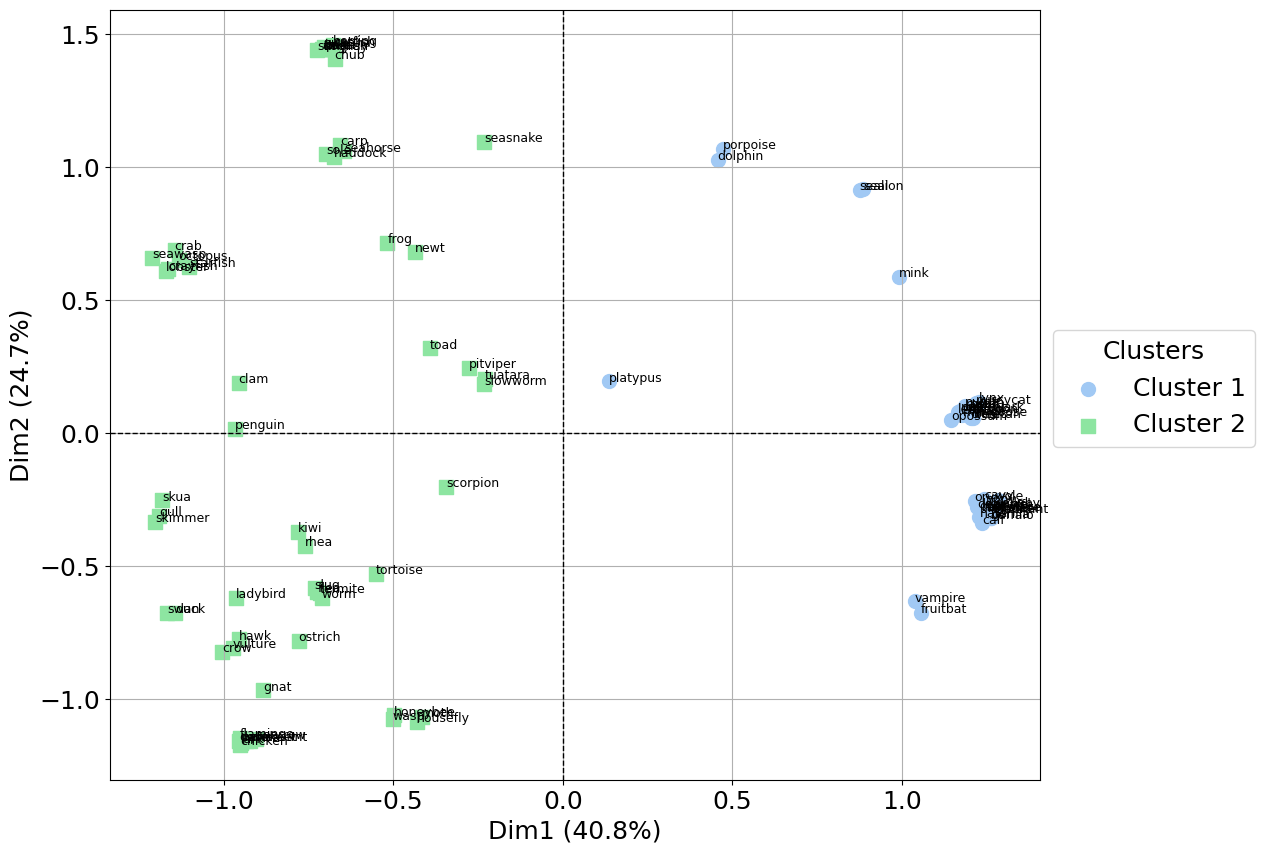

           1         2
0   aardvark      bass
1   antelope      carp
2       bear   catfish
3       boar   chicken
4    buffalo      chub
5       calf      clam
6       cavy      crab
7    cheetah  crayfish
8       deer      crow
9    dolphin   dogfish
10  elephant      dove
11  fruitbat      duck
12   giraffe  flamingo
13      girl      flea
14      goat      frog
15   gorilla      gnat
16   hamster      gull
17      hare   haddock
18   leopard      hawk
19      lion   herring
20      lynx  honeybee
21      mink  housefly
22      mole      kiwi
23  mongoose  ladybird
24   opossum      lark
25      oryx   lobster
26  platypus      moth
27   polecat      newt
28      pony   octopus
29  porpoise   ostrich
30      puma  parakeet
31  pussycat   penguin
32   raccoon  pheasant
33  reindeer      pike
34      seal   piranha
35   sealion  pitviper
36  squirrel      rhea
37   vampire  scorpion
38      vole  seahorse
39   wallaby  seasnake
40      wolf   seawasp
41      None   skimmer
42      Non

In [151]:
f(animals, num_clust=2, distance_metric='cityblock', linkage_method='complete')